# Installation and Setup

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Importing kaggle dataset

In [ ]:
! pip install -q kaggle

In [ ]:
! mkdir -p ~/.kaggle

In [7]:
#import API key to google colab
from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [8]:
#copy API key to kaggle directory
! cp kaggle.json ~/.kaggle/

In [10]:
#disable API key
! chmod 600 /root/.kaggle/kaggle.json

In [11]:
#list of datasets from kaggle
! kaggle datasets list

ref                                                           title                                                size  lastUpdated          downloadCount  
------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  
utkarshxy/who-worldhealth-statistics-2020-complete            World Health Statistics 2020|Complete|Geo-Analysis    1MB  2021-01-10 18:25:49           2126  
gpreda/pfizer-vaccine-tweets                                  Pfizer Vaccine Tweets                               507KB  2021-01-11 12:07:20           1361  
arashnic/covid19-case-surveillance-public-use-dataset         Covid-19 Case Surveillance Public Use Dataset        46MB  2020-12-21 02:24:21           1066  
ashkhagan/women-representation-in-city-property-sanfrancisco  Women Representation in City Property SanFrancisco    3KB  2020-12-13 05:18:14            340  
google/android-smartphones-high-accuracy-datasets   

In [12]:
#importing dataset
! kaggle datasets download -d tongpython/cat-and-dog

 95% 208M/218M [00:02<00:00, 131MB/s]
100% 218M/218M [00:02<00:00, 107MB/s]


In [13]:
#unzip dataset
! unzip -q /content/cat-and-dog.zip

# Building the Model

In [14]:
#Creating object - initializing CNN
model=tf.keras.models.Sequential()

In [15]:
#First CNN layer - input layer (even though images size is larger than 32,32,3 we have used this parameter to improve processing)
model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu', input_shape=[32,32,3]))


In [17]:
#add maxpool layer
model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2,padding='valid'))

In [18]:
#Second CNN layer and MaxPool layer
model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2,padding='valid'))

In [19]:
#Add flattening layer
model.add(tf.keras.layers.Flatten())

In [20]:
#Add dropout layer
model.add(tf.keras.layers.Dropout(0.4))

In [21]:
#adding first fully connected Dense layer
model.add(tf.keras.layers.Dense(units=128,activation='relu'))

In [22]:
#adding second fully connected Dense layer - Output Layer [unit=1 as output is binary, answer is only single. SAME reason for choosing activation as sigmoid]
model.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

In [23]:
#compile model [ since output is binary, the loss='binary_crossentropy', metrics=['accuracy']]
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 4096)              0         
_________________________________________________________________
dropout (Dropout)            (None, 4096)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               5

# Fitting CNN to images

In [25]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [30]:
training_data_dir='/content/training_set/training_set'
test_data_dir='/content/test_set/test_set'

In [31]:
#rescale images
datagen = ImageDataGenerator(rescale=.1/255)

In [32]:
training_set = datagen.flow_from_directory(training_data_dir,target_size=(32, 32),class_mode='binary',batch_size=32)
test_set = datagen.flow_from_directory(test_data_dir,target_size=(32, 32),class_mode='binary',batch_size=32)

Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


In [35]:
len(training_set),len(test_set)

(251, 64)

In [36]:
len(training_set)*32,len(test_set)*32

(8032, 2048)

In [37]:
 training_set.batch_size

32

In [41]:
history= model.fit_generator(generator=training_set,steps_per_epoch=251,epochs=20,validation_data=test_set,validation_steps=64)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
251/251 [==============================] - 50s 199ms/step - loss: 0.6379 - accuracy: 0.6354 - val_loss: 0.6286 - val_accuracy: 0.6619
Epoch 2/20
251/251 [==============================] - 49s 197ms/step - loss: 0.6049 - accuracy: 0.6731 - val_loss: 0.5882 - val_accuracy: 0.6920
Epoch 3/20
251/251 [==============================] - 50s 199ms/step - loss: 0.5805 - accuracy: 0.6903 - val_loss: 0.6008 - val_accuracy: 0.6876
Epoch 4/20
251/251 [==============================] - 50s 197ms/step - loss: 0.5584 - accuracy: 0.7157 - val_loss: 0.5568 - val_accuracy: 0.7098
Epoch 5/20
251/251 [==============================] - 50s 199ms/step - loss: 0.5446 - accuracy: 0.7194 - val_loss: 0.5675 - val_accuracy: 0.7074
Epoch 6/20
251/251 [==============================] - 50s 200ms/step - loss: 0.5308 - accuracy: 0.7298 - val_loss: 0.5289 - val_accuracy: 0.7375
Epoch 7/20
251/251 [==============================] - 50s 199ms/step - loss: 0.5154 - accuracy: 0.7410 - val_loss: 0.5253 - val_ac

In [ ]:
#accuracy is training_data accuracy and val_accuracy is test_set_data accuracy
#high diff between accuracy and val_accuracy means model learnt too much from training(overfitted) - to remedy u can add more dropout layers after maxpool/after fully connected layer, increase input_shape to (64,64,3),change batch_size,change target_size etc
#or also increase steps_per_epochs,epochs or validation_steps

# Plotting Learning Curve

In [49]:
def learning_curve(history,epoch):

  #training vs validation accuracy
  epoch_range= range(1,epoch+1)
  plt.plot(epoch_range,history.history['accuracy'])
  plt.plot(epoch_range,history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('epoch')
  plt.legend(['Train','val'], loc='upper left')
  plt.show()


  #training vs validation loss
  plt.plot(epoch_range,history.history['loss'])
  plt.plot(epoch_range,history.history['val_loss'])
  plt.title('Model Loss')
  plt.ylabel('Loss')
  plt.xlabel('epoch')
  plt.legend(['Train','val'], loc='upper left')
  plt.show()

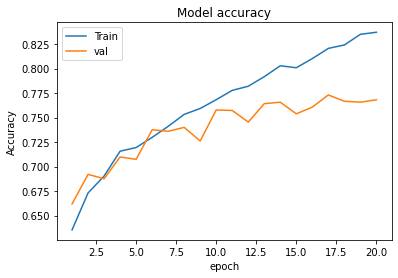

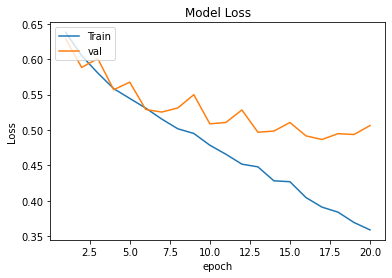

In [50]:
learning_curve(history,20) #used epoch=20 because we had trained model on 20 epochs

In [ ]:
 #by seeing the lines above we can see after about 7.5 epoch the val_accuracy lines goes horizontal and isnt increasing- it is overfitted after 7.5epoch.
 #after 7.5 epoch loss isnt decreasing, so it is overfitted.